In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv("D:/Data Sets/alzheimers_prediction_dataset.csv")

In [4]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,Normal,No,90,Low,Poor,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,Normal,No,65,Low,Good,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,Normal,No,43,High,Good,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,Normal,No,81,Medium,Average,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,Normal,No,49,High,Poor,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [5]:
df.shape

(74283, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [7]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [8]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [9]:
df.drop(columns=['Education Level'],inplace=True)

In [10]:
df.shape

(74283, 24)

In [11]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Iterate through each categorical column and print value counts
for column in categorical_columns:
    print(f"Value Counts for '{column}':")
    print(df[column].value_counts())
    print("-" * 30)

Value Counts for 'Country':
Country
Brazil          3839
Germany         3807
Australia       3787
Russia          3778
South Africa    3760
Japan           3751
India           3741
South Korea     3732
Argentina       3731
Italy           3724
Canada          3711
France          3710
Norway          3706
Spain           3698
Sweden          3689
Saudi Arabia    3662
UK              3651
USA             3616
Mexico          3598
China           3592
Name: count, dtype: int64
------------------------------
Value Counts for 'Gender':
Gender
Female    37249
Male      37034
Name: count, dtype: int64
------------------------------
Value Counts for 'Physical Activity Level':
Physical Activity Level
High      24853
Low       24754
Medium    24676
Name: count, dtype: int64
------------------------------
Value Counts for 'Smoking Status':
Smoking Status
Current    24915
Never      24740
Former     24628
Name: count, dtype: int64
------------------------------
Value Counts for 'Alcohol Consump

## Check and Handling the Outlier

In [12]:
int_feature=df.select_dtypes(include=["float64","int64"]).columns
print("Total number of integer feature : ", int_feature.shape[0])
print("Integer feature names: ", int_feature)

Total number of integer feature :  3
Integer feature names:  Index(['Age', 'BMI', 'Cognitive Test Score'], dtype='object')


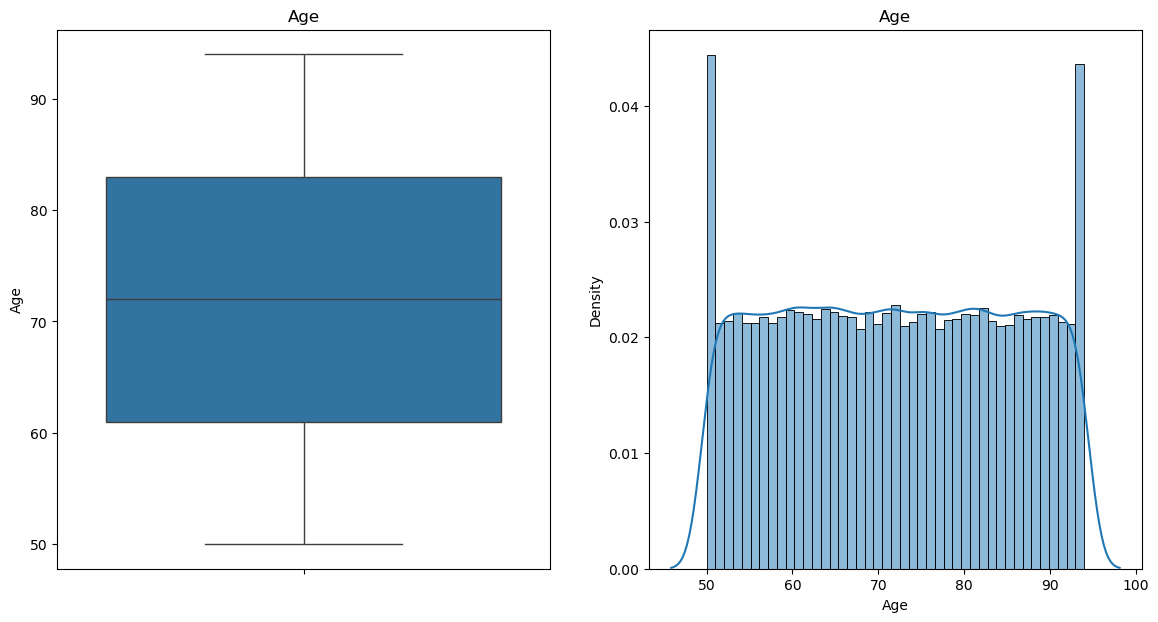

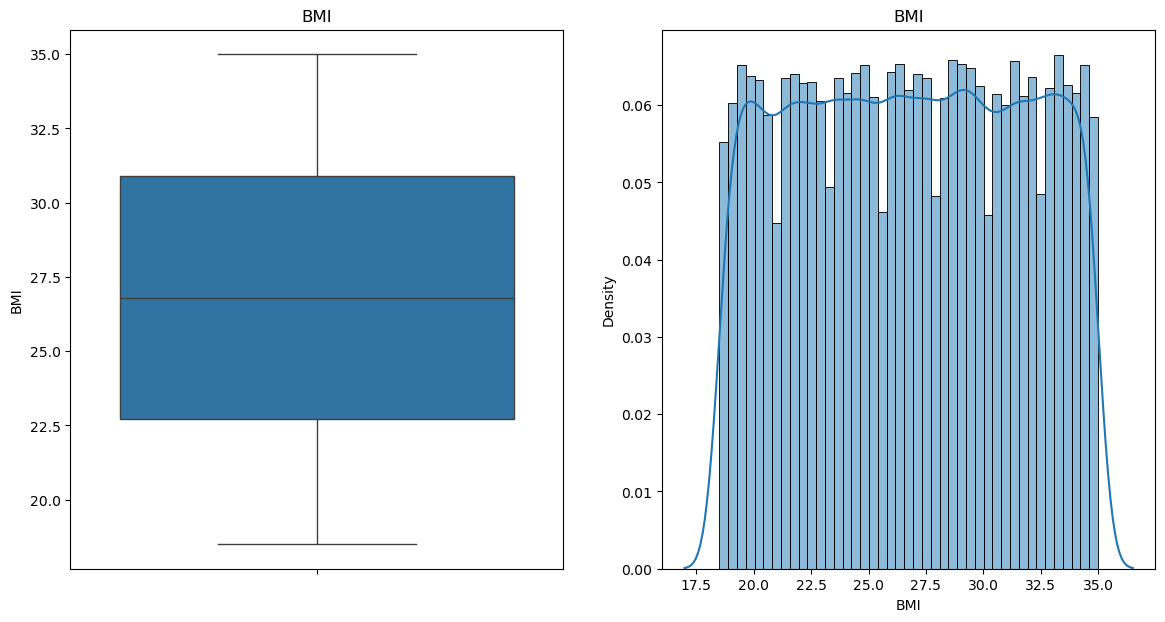

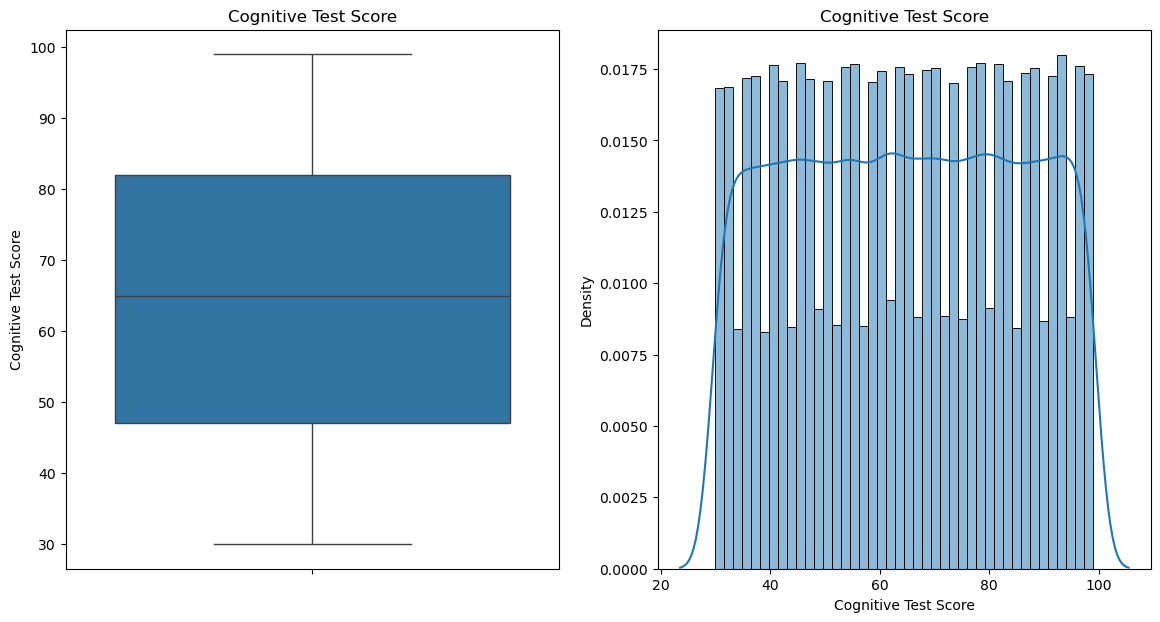

In [13]:
for col in int_feature:
   plt.figure(figsize=(14,7))
   plt.subplot(121)
   sns.boxplot(df[col])
   plt.title(col)
    
   plt.subplot(122)
   sns.histplot(df[col], kde=True,stat="density", kde_kws=dict(cut=3))
   plt.title(col)
plt.show()

In [14]:
new_df_cap = df.copy()
for col in int_feature:
       percentile25 = df[col].quantile(0.25)
       percentile75 = df[col].quantile(0.75)

       iqr = percentile75 - percentile25

       upper_limit = percentile75 + 1.5 * iqr
       lower_limit = percentile25 - 1.5 * iqr
       #capping
       
 
       new_df_cap[col] = np.where(
         new_df_cap[col] > upper_limit,
         upper_limit,
         np.where(
                  new_df_cap[col] < lower_limit,
                  lower_limit,
                  new_df_cap[col]
                  )
       )

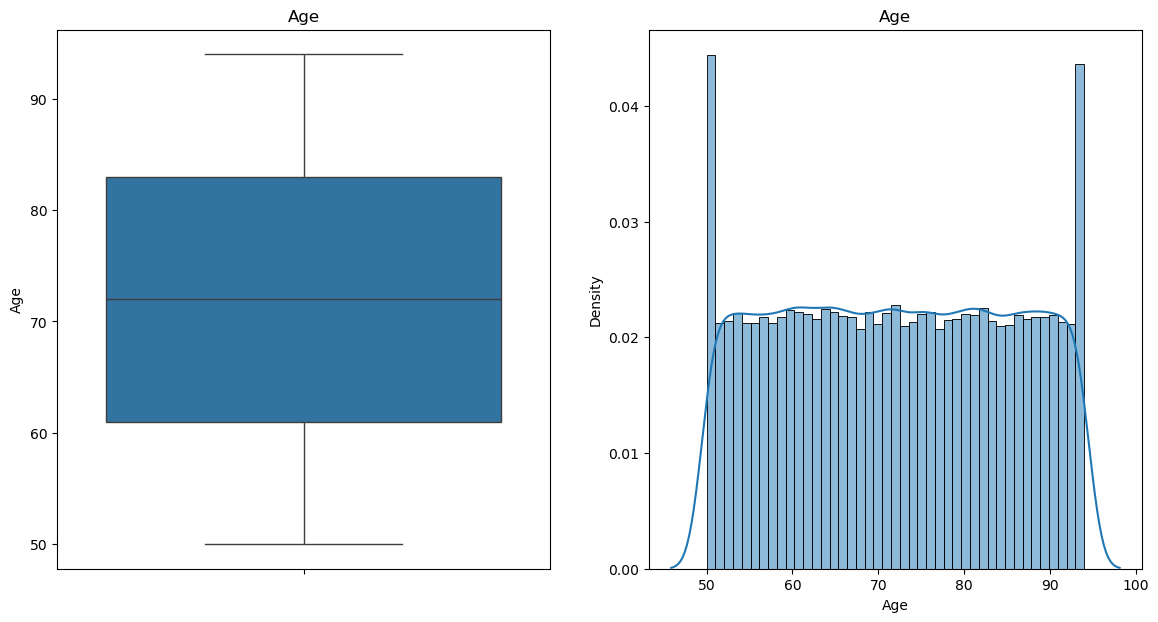

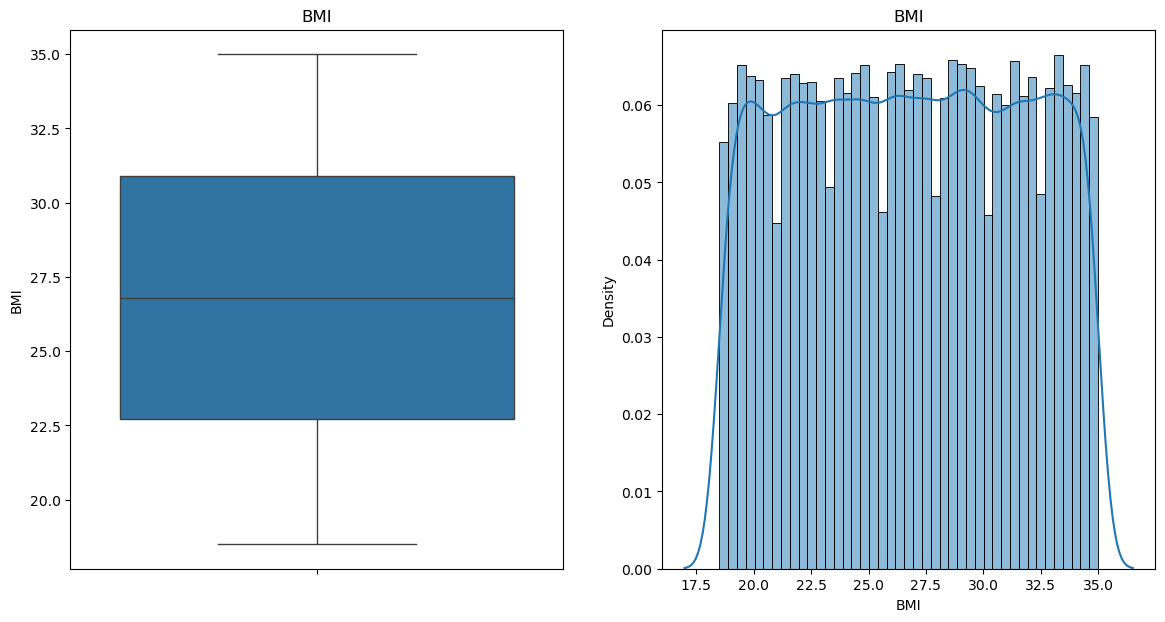

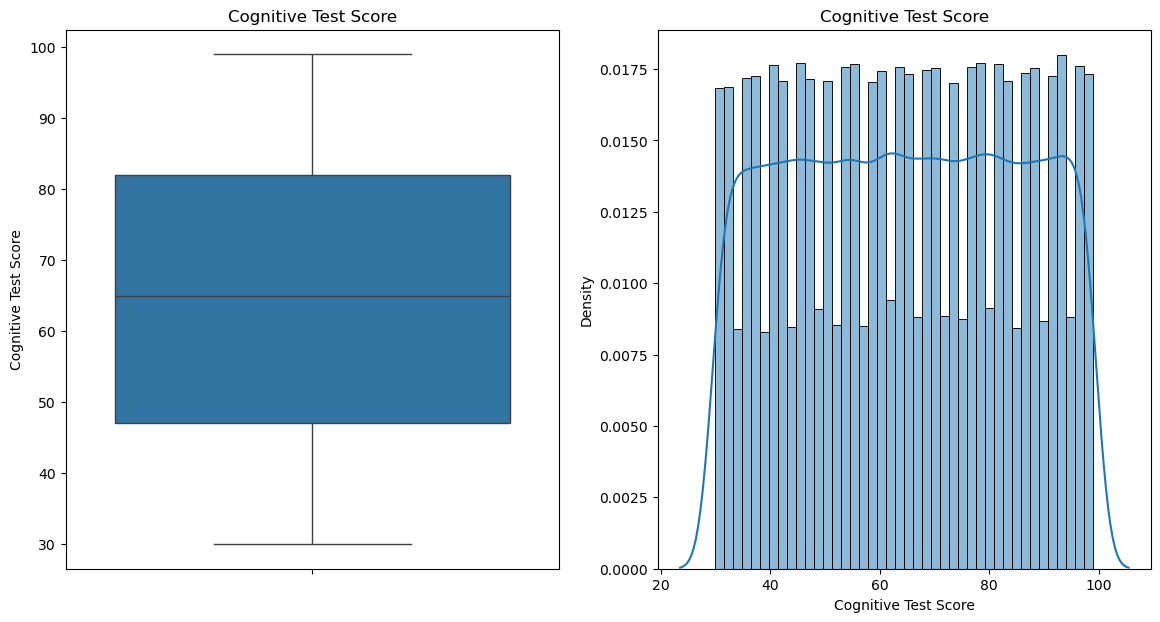

In [15]:
for col in int_feature:
   plt.figure(figsize=(14,7))
   plt.subplot(121)
   sns.boxplot(new_df_cap[col])
   plt.title(col)
    
   plt.subplot(122)
   sns.histplot(new_df_cap[col], kde=True,stat="density", kde_kws=dict(cut=3))
   plt.title(col)
plt.show()

## Applying Ordinal and Nominal Encoding

In [16]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Copy original dataframe
df_encoded = df.copy()

# **Ordinal Encoding for ordered categories**
ordinal_features = {
    'Stress Levels': ['Low', 'Medium', 'High'],
    'Social Engagement Level': ['Low', 'Medium', 'High'],
    'Income Level': ['Low', 'Medium', 'High'],
    'Sleep Quality': ['Poor', 'Average', 'Good', 'Excellent']
}

ordinal_encoder = OrdinalEncoder(categories=[ordinal_features[col] for col in ordinal_features])
df_encoded[list(ordinal_features.keys())] = ordinal_encoder.fit_transform(df_encoded[list(ordinal_features.keys())])

# **One-Hot Encoding for nominal categories**
nominal_features = [
    'Country', 'Gender', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 
    'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 
    'Depression Level', 'Dietary Habits', 'Air Pollution Exposure', 'Employment Status', 
    'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Urban vs Rural Living'
]

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity
encoded_nominal = one_hot_encoder.fit_transform(df_encoded[nominal_features])

# Convert to DataFrame and merge
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=one_hot_encoder.get_feature_names_out(nominal_features))
df_encoded = df_encoded.drop(columns=nominal_features).join(encoded_nominal_df)

# **Convert Target Column ('Alzheimer’s Diagnosis') into 0 & 1**
df_encoded['Alzheimer’s Diagnosis'] = df_encoded['Alzheimer’s Diagnosis'].map({'No': 0, 'Yes': 1})

# Save the preprocessed dataset
df_encoded.to_csv("alzheimers_prediction_dataset_encoded.csv", index=False)

In [17]:
df_encoded.head()

,Age,BMI,Cognitive Test Score,Sleep Quality,Social Engagement Level,Income Level,Stress Levels,Alzheimer’s Diagnosis,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_Mexico,Country_Norway,Country_Russia,Country_Saudi Arabia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sweden,Country_UK,Country_USA,Gender_Male,Physical Activity Level_Low,Physical Activity Level_Medium,Smoking Status_Former,Smoking Status_Never,Alcohol Consumption_Occasionally,Alcohol Consumption_Regularly,Diabetes_Yes,Hypertension_Yes,Cholesterol Level_Normal,Family History of Alzheimer’s_Yes,Depression Level_Low,Depression Level_Medium,Dietary Habits_Healthy,Dietary Habits_Unhealthy,Air Pollution Exposure_Low,Air Pollution Exposure_Medium,Employment Status_Retired,Employment Status_Unemployed,Marital Status_Single,Marital Status_Widowed,Genetic Risk Factor (APOE-ε4 allele)_Yes,Urban vs Rural Living_Urban
0,90,33.0,90,0.0,0.0,1.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,72,29.9,65,2.0,2.0,0.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,86,22.9,43,2.0,0.0,1.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,53,31.2,81,1.0,2.0,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,58,30.0,49,0.0,0.0,1.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df_encoded.shape

(74283, 50)

## Define Feature and Target Variable

In [19]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Alzheimer’s Diagnosis', axis=1)  
y = df_encoded['Alzheimer’s Diagnosis'] 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.head()

,Age,BMI,Cognitive Test Score,Sleep Quality,Social Engagement Level,Income Level,Stress Levels,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_Mexico,Country_Norway,Country_Russia,Country_Saudi Arabia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sweden,Country_UK,Country_USA,Gender_Male,Physical Activity Level_Low,Physical Activity Level_Medium,Smoking Status_Former,Smoking Status_Never,Alcohol Consumption_Occasionally,Alcohol Consumption_Regularly,Diabetes_Yes,Hypertension_Yes,Cholesterol Level_Normal,Family History of Alzheimer’s_Yes,Depression Level_Low,Depression Level_Medium,Dietary Habits_Healthy,Dietary Habits_Unhealthy,Air Pollution Exposure_Low,Air Pollution Exposure_Medium,Employment Status_Retired,Employment Status_Unemployed,Marital Status_Single,Marital Status_Widowed,Genetic Risk Factor (APOE-ε4 allele)_Yes,Urban vs Rural Living_Urban
14565,53,19.7,66,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7007,92,31.2,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
40329,64,20.7,59,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
21854,85,19.1,81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
74204,55,20.6,65,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [21]:
X_train.shape

(59426, 49)

## Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fit the Model

In [23]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_test_scaled)

## Check Accuracy

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print Results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Model Accuracy: 0.72

Confusion Matrix:
 [[6938 1781]
 [2451 3687]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      8719
           1       0.67      0.60      0.64      6138

    accuracy                           0.72     14857
   macro avg       0.71      0.70      0.70     14857
weighted avg       0.71      0.72      0.71     14857



## Plot Confusion Matrix

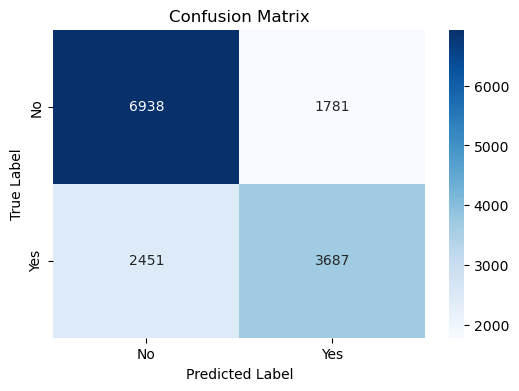

In [25]:
# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()